# Load the dataset, preprocess it and create DataLoaders

In [3]:
import torch
import numpy as np
# set seeds
torch.seed = 42
np.random.seed(42)

In [4]:
# load dataset from pickle file
import pandas as pd

df = pd.read_pickle("SafetyPointGoal1Dataset0.pkl")

In [5]:
df.describe()

,accelerometer0,accelerometer1,accelerometer2,velocimeter0,velocimeter1,velocimeter2,gyro0,gyro1,gyro2,magnetometer0,...,vases_lidar9,vases_lidar10,vases_lidar11,vases_lidar12,vases_lidar13,vases_lidar14,vases_lidar15,action0,action1,exp_cost
count,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.0,100000.0,100000.0,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.069010,-0.001533,9.810000e+00,0.023808,0.001872,0.0,0.0,0.0,0.006035,-0.000537,...,0.053299,0.053256,0.053404,0.053087,0.052577,0.053171,0.053593,0.000356,0.003248,9.916320
std,1.926543,6.733668,1.500540e-15,0.718428,0.577444,0.0,0.0,0.0,2.374169,0.352747,...,0.152026,0.151757,0.151848,0.151066,0.150142,0.151592,0.153017,1.072705,1.115400,19.740233
min,-5.452849,-19.989003,9.810000e+00,-1.499778,-1.081251,0.0,0.0,0.0,-3.038259,-0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.609840,-4.453977,0.000000
25%,-1.879547,-1.475206,9.810000e+00,-0.453180,-0.639035,0.0,0.0,0.0,-2.815359,-0.351950,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.686058,-0.902644,0.000000
50%,0.023382,-0.015324,9.810000e+00,0.020276,0.002603,0.0,0.0,0.0,0.020454,-0.001902,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006072,0.003101,0.000000
75%,2.059706,1.469249,9.810000e+00,0.504858,0.639037,0.0,0.0,0.0,2.808083,0.352273,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.680545,0.902431,15.000000
max,5.351211,19.983345,9.810000e+00,1.499773,1.053874,0.0,0.0,0.0,3.039440,0.500000,...,0.933722,0.933531,0.933638,0.933393,0.932465,0.922693,0.917074,7.266669,4.720612,200.000000


In [6]:
# Seperate the dataset into data and label again
# remove third velocimeter and accelerometer and magnetometer columns as they are for the z-axis and therefore irrelevant
# also remove gyro0 and gyro1 as there is no rotation possible on the x and y axis
X = df.drop(columns=["exp_cost", "velocimeter2", "accelerometer2", "magnetometer2", "gyro0", "gyro1"])
y = df.exp_cost

(array([7.8766e+04, 1.3124e+04, 4.7600e+03, 1.8520e+03, 8.0200e+02,
        3.7800e+02, 1.8800e+02, 8.2000e+01, 3.6000e+01, 1.2000e+01]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.]),
 <BarContainer object of 10 artists>)

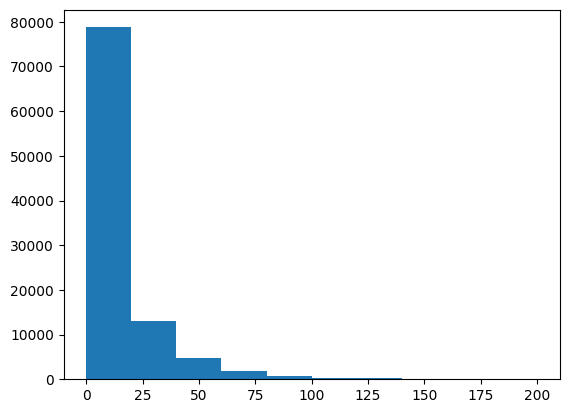

In [77]:
import matplotlib.pyplot as plt

plt.hist(y)

In [7]:
obs_column_names = ['accelerometer0', 'accelerometer1', 'velocimeter0', 'velocimeter1', 'gyro2', 'magnetometer0', 'magnetometer1']
for key in ['goal_lidar', 'hazards_lidar', 'vases_lidar']:
    for i in range(16):
        obs_column_names.append(key+str(i))
obs_column_names.append("action0")
obs_column_names.append("action1")
len(obs_column_names)

57

In [8]:
# Scaling the data with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler((0,1))
scaled = scaler.fit_transform(X)
scaled_X = pd.DataFrame(scaled, columns=obs_column_names)
scaled_X.head()

,accelerometer0,accelerometer1,velocimeter0,velocimeter1,gyro2,magnetometer0,magnetometer1,goal_lidar0,goal_lidar1,goal_lidar2,...,vases_lidar8,vases_lidar9,vases_lidar10,vases_lidar11,vases_lidar12,vases_lidar13,vases_lidar14,vases_lidar15,action0,action1
0,0.433478,0.788590,0.133874,0.776725,0.582009,0.029088,0.668053,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.338574,0.490314
1,0.339722,0.460362,0.338908,0.892061,0.998717,0.041138,0.698610,0.0,0.0,0.0,...,0.492113,0.629606,0.137120,0.0,0.0,0.0,0.0,0.0,0.424049,0.655643
2,0.704106,0.535025,0.656853,0.166961,0.988933,0.333022,0.971294,0.0,0.0,0.0,...,0.210128,0.780801,0.570618,0.0,0.0,0.0,0.0,0.0,0.514721,0.687201
3,0.712390,0.469264,0.641438,0.805581,0.010329,0.980087,0.360298,0.0,0.0,0.0,...,0.666369,0.682326,0.015416,0.0,0.0,0.0,0.0,0.0,0.442407,0.292759
4,0.518254,0.217423,0.975002,0.368165,0.454788,0.296595,0.043244,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.483764,0.500775


In [9]:
scaled_X.describe()

,accelerometer0,accelerometer1,velocimeter0,velocimeter1,gyro2,magnetometer0,magnetometer1,goal_lidar0,goal_lidar1,goal_lidar2,...,vases_lidar8,vases_lidar9,vases_lidar10,vases_lidar11,vases_lidar12,vases_lidar13,vases_lidar14,vases_lidar15,action0,action1
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.511091,0.500032,0.507938,0.507288,0.500896,0.499463,0.500887,0.056146,0.056738,0.056568,...,0.056717,0.057083,0.057048,0.057200,0.056875,0.056385,0.057626,0.058439,0.435692,0.485823
std,0.178317,0.168458,0.239512,0.270450,0.390636,0.352747,0.354360,0.158660,0.160283,0.160234,...,0.161911,0.162817,0.162562,0.162641,0.161846,0.161016,0.164293,0.166853,0.083307,0.121575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.330737,0.463165,0.348918,0.207115,0.036675,0.148050,0.146654,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.382385,0.387084
50%,0.506868,0.499687,0.506761,0.507630,0.503268,0.498098,0.501473,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.436136,0.485807
75%,0.695346,0.536827,0.668312,0.805708,0.961934,0.852273,0.856394,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.488516,0.583831
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# Divide data into train, test and validation set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2)

In [11]:
X_train.shape

(64000, 57)

In [12]:
X_validate.shape

(16000, 57)

In [13]:
X_test.shape

(20000, 57)

In [14]:
import torch
import numpy as np
from torch.utils.data import TensorDataset

# Convert dataset into a TensorDataset
train_dataset = TensorDataset(torch.from_numpy(X_train.values.astype(np.float32)), torch.from_numpy(y_train.values.astype(np.float32)))
validation_dataset = TensorDataset(torch.from_numpy(X_validate.values.astype(np.float32)), torch.from_numpy(y_validate.values.astype(np.float32)))
test_dataset = TensorDataset(torch.from_numpy(X_test.values.astype(np.float32)), torch.from_numpy(y_test.values.astype(np.float32)))


In [15]:
from torch.utils.data import DataLoader

# Putting data into dataloaders for PyTorch
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Building a model 

In [45]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ExpectedCostNN(nn.Module):
    def __init__(self):
        super(ExpectedCostNN, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(57, 64),
            nn.ReLU(),
            nn.Linear(64,1)
        )
    
    
    def forward(self, x):
        return self.fc(x)

In [17]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")

Using cuda device


In [78]:
model = ExpectedCostNN().to(device)
print(model)

ExpectedCostNN(
  (fc): Sequential(
    (0): Linear(in_features=57, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=1, bias=True)
  )
)


# Training a neural network on the dataset

In [79]:
loss_fn = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [80]:
# code from https://docs.pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [81]:
# code adapted to regression problem from original code https://docs.pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss= 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()

    test_loss /= num_batches
    print(f"Avg loss: {test_loss:>8f} \n")
    return test_loss

In [82]:
# code from https://docs.pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_loader, model, loss_fn, optimizer)
    test(test_loader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------


/home/user/bachelor/RL/lib/python3.8/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/user/bachelor/RL/lib/python3.8/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Avg loss: 377.963227 

Epoch 2
-------------------------------
Avg loss: 377.823396 

Epoch 3
-------------------------------
Avg loss: 377.758091 

Epoch 4
-------------------------------
Avg loss: 377.382269 

Epoch 5
-------------------------------
Avg loss: 377.335206 

Epoch 6
-------------------------------
Avg loss: 377.428332 

Epoch 7
-------------------------------
Avg loss: 377.970975 

Epoch 8
-------------------------------
Avg loss: 377.360335 

Epoch 9
-------------------------------
Avg loss: 378.587842 

Epoch 10
-------------------------------
Avg loss: 377.252595 

Done!


In [88]:
# save the model
torch.save(model, "simple_model.pt")

# Evaluation of the model / Hyperparameter tuning

exp_cost has a mean of 9.91 and standard deviation of 19.74.
That means an acceptal model should have produce a MSE lower much lower than 390 which is the variance of the data. 

1. Comparing optimizers

In [49]:
optimizers = {"SGD": torch.optim.SGD(model.parameters(), lr=1e-3),
              "RMSProp": torch.optim.RMSprop(model.parameters(), lr=1e-3),
              "Adam": torch.optim.Adam(model.parameters(), lr=1e-1)
                }

In [50]:
# SGD
model_sgd = ExpectedCostNN().to(device)
sgd = torch.optim.SGD(model_sgd.parameters(), lr=1e-3)
for _ in range(10):
    train(train_loader, model_sgd, loss_fn, sgd)
print("SGD:\n-------------------------------")
mse_score = test(validation_loader, model_sgd, loss_fn)
print(f"R^2 Score: {1-mse_score/np.var(y_validate):>8f}")

SGD:
-------------------------------
Avg loss: 399.143951 

R^2 Score: -0.000251


In [ ]:
# RMSProp
model_rms = ExpectedCostNN().to(device)
rms = torch.optim.RMSprop(model_rms.parameters(), lr=1e-3)
for _ in range(10):
    train(train_loader, model_rms, loss_fn, rms)
print("RMSProp:\n-------------------------------")
mse_score = test(validation_loader, model_rms, loss_fn)
print(f"R^2 Score: {1-mse_score/np.var(y_validate):>8f}")

SGD:
-------------------------------
Avg loss: 399.220341 

R^2 Score: -0.000442


In [ ]:
# ADAM
model_adam = ExpectedCostNN().to(device)
adam = torch.optim.SGD(model_adam.parameters(), lr=1e-3)
for _ in range(10):
    train(train_loader, model_adam, loss_fn, adam)
print("Adam:\n-------------------------------")
mse_score = test(validation_loader, model_adam, loss_fn)
print(f"R^2 Score: {1-mse_score/np.var(y_validate):>8f}")

SGD:
-------------------------------
Avg loss: 399.079756 

R^2 Score: -0.000090


2. Trying out different learning rates

In [59]:
learning_rates = np.linspace(1e-4, 1e-2, 5)
for lr in learning_rates:
    model = ExpectedCostNN().to(device)
    adam = torch.optim.SGD(model_adam.parameters(), lr=lr)
    for _ in range(10):
        train(train_loader, model_adam, loss_fn, adam)
    print(f"Learning rate {lr}:\n-------------------------------")
    mse_score = test(validation_loader, model_adam, loss_fn)
    print(f"R^2 Score: {1-mse_score/np.var(y_validate):>8f}")

/home/user/bachelor/RL/lib/python3.8/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Learning rate 0.0001:
-------------------------------
Avg loss: 399.062979 

R^2 Score: -0.000048
Learning rate 0.002575:
-------------------------------
Avg loss: 400.825031 

R^2 Score: -0.004463
Learning rate 0.005050000000000001:
-------------------------------
Avg loss: 399.033265 

R^2 Score: 0.000027
Learning rate 0.007525000000000001:
-------------------------------
Avg loss: 399.034968 

R^2 Score: 0.000022
Learning rate 0.01:
-------------------------------
Avg loss: 399.041231 

R^2 Score: 0.000007


3. Determining a good model design

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ExpectedCostNN(nn.Module):
    def __init__(self, hidden_layers):
        super(ExpectedCostNN, self).__init__()
        self.layers = hidden_layers
    
    
    def forward(self, x):
        return self.layers(x)

In [ ]:
def train_and_eval(amount, size, epochs=5):
    layers = [nn.Linear(57, size), nn.ReLU()]
    for _ in range(amount):
        layers.append(nn.Linear(size, size))
        layers.append(nn.ReLU())
    layers.append(nn.Linear(size,1))
    model = ExpectedCostNN(nn.Sequential(*layers)).to(device)
    optimizer = torch.optim.adam(model.parameters(), lr=1e-3)
    for t in range(epochs):
        train(train_loader, model, loss_fn, optimizer)
    print(f"{amount} * {size}:\n-------------------------------")
    test(test_loader, model, loss_fn)

In [22]:
hidden_layer_sizes = [32, 64, 128, 256]
hidden_layer_amounts = [1, 2, 3, 4]

for i in hidden_layer_amounts:
    for j in hidden_layer_sizes:
        train_and_eval(i, j)

1 * 32:
-------------------------------
Avg loss: 400.265770 

1 * 64:
-------------------------------
Avg loss: 399.005155 

1 * 128:
-------------------------------
Avg loss: 398.130220 

1 * 256:
-------------------------------
Avg loss: 398.217007 

2 * 32:
-------------------------------
Avg loss: 398.054952 

2 * 64:
-------------------------------
Avg loss: 398.035413 

2 * 128:
-------------------------------
Avg loss: 398.008653 

2 * 256:
-------------------------------
Avg loss: 398.154671 

3 * 32:
-------------------------------
Avg loss: 398.608153 

3 * 64:
-------------------------------
Avg loss: 400.134154 

3 * 128:
-------------------------------
Avg loss: 398.012474 

3 * 256:
-------------------------------
Avg loss: 398.006742 

4 * 32:
-------------------------------
Avg loss: 398.285077 

4 * 64:
-------------------------------
Avg loss: 398.019244 

4 * 128:
-------------------------------
Avg loss: 398.011666 

4 * 256:
-------------------------------
Avg los

In [ ]:
# 